# squidgames glass bridge screen
### 16 players, 18 steps, 
### players must cross all 18 steps in order to live
### players can memorize the correct step ahead of them
### players cannot commit suicide
### players cannot pass each other

In [1]:
# importing required libraries

import random
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

from matplotlib.ticker import PercentFormatter


plt.style.use('dark_background')


In [37]:
# game design
## assumptions ##
# - 16 players, 18 steps
# - randomly assigned "safe" and "dangerous" tiles
# - players will memorize the course
# - players cannot commit suicide


class Player:
    "Player piece"
    def __init__(self, player_position, total_steps=18):
        self.bridge_position = 0 # where this player is on the bridge
        self.player_position = player_position # where this player is in the sequence
        self.leader = False # if this player is in the lead
        self.alive = True # if this player is still alive
        self.active = True
        self.survived = False
        self.total_steps = total_steps


    def lead_step(self):
        if self.alive==True and self.active==True:
            if self.bridge_position <= self.total_steps:
                self.bridge_position +=1
                self.side_choice = random.choice(['a','b'])
            else:
                self.active=False
                
                    
class Tile:
    "Tile Piece"
    def __init__(self, step, side, safe=True):
        self.side=side
        self.step=step
        self.safe=safe

class Bridge:    
    def __init__(self):
        self.name=''
        
    def draw_bridge(self, total_steps=18):
        """Reinitializes the bridge sequence"""
        self.bridge=[]
        self.total_steps=total_steps
        side = ['a','b']
        step = [i for i in range(1,self.total_steps+1)]
        for s in step:
            for d in side:
                if d=='a':
                    safe = random.choice([True, False])
                else:
                    if safe==True:
                        safe=False
                    else:
                        safe = True
                self.bridge.append(Tile(s,d,safe))


class Game:
    def __init__(self,game_number, total_steps=18, total_players = 16):
        self.game_numnber = game_number
        self.bridge = Bridge()
        self.total_steps=total_steps
        self.total_players = total_players
        
    def setup_game(self):
        "Initializes the game"
        self.bridge.draw_bridge(self.total_steps)
        self.glass_bridge = {}
        for tile in self.bridge.bridge:
            self.glass_bridge[str(tile.step)+tile.side]=tile.safe

        
        self.players = [Player(i,self.total_steps) for i in range(1,self.total_players+1)]
        
    def play_game(self):
        memory=0
        self.results = {}
        
        for player in self.players:
            player.bridge_position = memory
#             print('Player ', player.player_position)            

            if memory < self.total_steps:
            

                while player.alive==True and player.active==True and player.bridge_position<=self.total_steps:
                    if player.bridge_position < self.total_steps:
                        player.lead_step()
                        tile_choice = str(player.bridge_position) + player.side_choice
#                         print(tile_choice)

                        if self.glass_bridge[tile_choice]==False:
                            player.alive=False
                            self.results[player.player_position] = player.survived

                        memory+=1

#                         print(player.alive)

                    elif player.bridge_position == self.total_steps:
                        player.survived=True
                        player.bridge_position += 1
#                         print(player.alive)
                        self.results[player.player_position] = player.survived
#                         pass
                    
            else:
                
                player.survived=True
                self.results[player.player_position] = player.survived                
#                 print(player.alive)
                pass
    


In [45]:
# simulate 100,000 games and gather statistics

number_of_players = 16
total_steps = 18

all_results = []
for i in tqdm(range(100_000)):
#     print(i)
    game=Game(i,total_steps=total_steps, total_players=number_of_players)
    game.setup_game()
    game.play_game()
    all_results.append(game.results)

summary = []
for result in all_results:
    if sum(value==False for value in result.values())<number_of_players:
        summary.append(sum(value==False for value in result.values())+1)
#     else:
#         summary.append(0)
    

myDict = {}
first_Dict={}
for i in range(1,number_of_players+1):
    myDict[i] = {}    
    myDict[i] = summary.count(i)

    first_Dict[i]={}
    first_Dict[i]= summary.count(i)
    try:
        myDict[i] += myDict[i-1]
    except:
        pass


100%|██████████| 100000/100000 [00:06<00:00, 14289.25it/s]


In [46]:
# all_results
# summary
# test
# first_Dict
# myDict

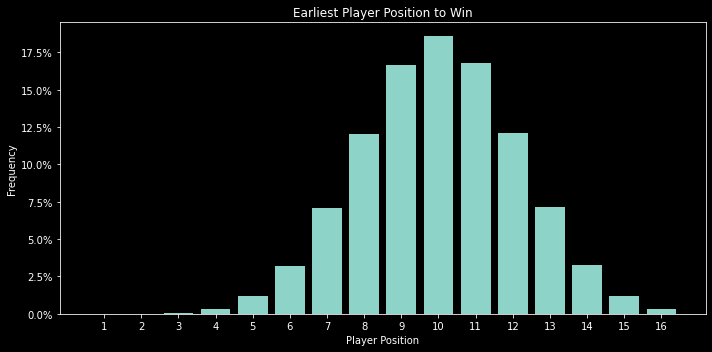

In [47]:
# plotting miniminum survival

df = pd.DataFrame.from_dict(first_Dict, orient='index')
plt.figure(figsize=(10,5))
plt.bar([str(i) for i in df.index], df[0]/100_000)
plt.gca().set(title='Earliest Player Position to Win', ylabel='Frequency', xlabel='Player Position')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.tight_layout()
plt.savefig('minimal.png', bbox_inches='tight', dpi = 300)
plt.show()


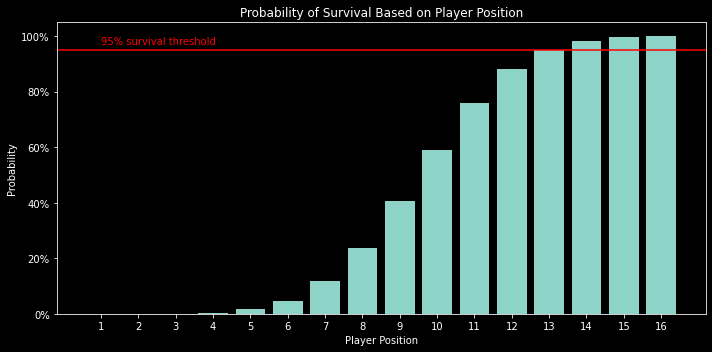

In [55]:
# plotting survival curve

df = pd.DataFrame.from_dict(myDict, orient='index')
plt.figure(figsize=(10,5))
plt.bar([str(i) for i in df.index], df[0]/100_000)
plt.gca().set(title='Probability of Survival Based on Player Position', ylabel='Probability', xlabel='Player Position')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.axhline(y=0.95, color = 'red')
plt.annotate("95% survival threshold", (0,0.97), color='red')
plt.tight_layout()
plt.savefig('survival.png', bbox_inches='tight', dpi = 300)


plt.show()

In [49]:
df['survival']=(df[0]/100)*100
df

,0,survival
1,0,0.0
2,6,6.0
3,72,72.0
4,381,381.0
5,1579,1579.0
6,4749,4749.0
7,11807,11807.0
8,23874,23874.0
9,40529,40529.0
10,59107,59107.0


In [57]:
total_steps = 100
number_of_players = total_steps


all_results = []
for i in tqdm(range(100_000)):
#     print(i)
    game=Game(i,total_steps=total_steps, total_players=number_of_players)
    game.setup_game()
    game.play_game()
    all_results.append(game.results)

summary = []
for result in all_results:
    if sum(value==False for value in result.values())<number_of_players:
        summary.append(sum(value==False for value in result.values())+1)
#     else:
#         summary.append(0)


myDict = {}
for i in range(1,number_of_players+1):
    myDict[i] = {}    
    myDict[i] = summary.count(i)
    try:
        myDict[i] += myDict[i-1]
    except:
        pass

df = pd.DataFrame.from_dict(myDict, orient='index')
df['survival']=(df[0]/100_000)*100


# optimal
# df
optimal = df.index[df['survival']> 95].to_list()[0]
optimal


100%|██████████| 100000/100000 [00:38<00:00, 2586.32it/s]


59

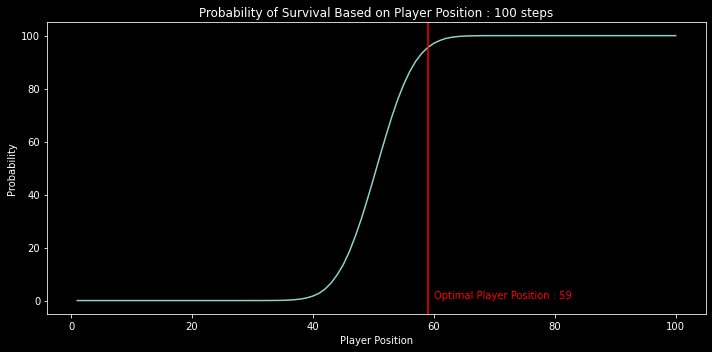

In [59]:

plt.figure(figsize=(10,5))
plt.plot(df['survival'])
plt.gca().set(title='Probability of Survival Based on Player Position : 100 steps', ylabel='Probability', xlabel='Player Position')
plt.axvline(x=optimal, color = 'red')
plt.annotate("Optimal Player Position : {}".format(optimal), (60,1), color='red')
plt.tight_layout()
plt.savefig('survival100.png', bbox_inches='tight', dpi = 300)
plt.show()


f (number of players, number of steps) = position for 95% survability

In [27]:
# simulate to find optimal curve

results={}

for steps in tqdm(range(1,456)):
    try:
        total_steps = steps
        number_of_players = total_steps


        all_results = []
        for i in range(1000):
        #     print(i)
            game=Game(i,total_steps=total_steps, total_players=number_of_players)
            game.setup_game()
            game.play_game()
            all_results.append(game.results)

        summary = []
        for result in all_results:
            if sum(value==False for value in result.values())<number_of_players:
                summary.append(sum(value==False for value in result.values())+1)
        #     else:
        #         summary.append(0)


        myDict = {}
        for i in range(1,number_of_players+1):
            myDict[i] = {}    
            myDict[i] = summary.count(i)
            try:
                myDict[i] += myDict[i-1]
            except:
                pass

        df = pd.DataFrame.from_dict(myDict, orient='index')
        df['survival']=(df[0]/1000)*100

        optimal = df.index[df['survival']> 95].tolist()[0]
        optimal

        results[steps]=optimal
    
    except:
        pass

100%|██████████| 455/455 [07:09<00:00,  1.06it/s]


In [28]:
df2 = pd.DataFrame.from_dict(results, orient='index')

In [29]:
x = np.array(df2.index)
y = np.array(df2[0])
m, b = np.polyfit(x, y, 1)


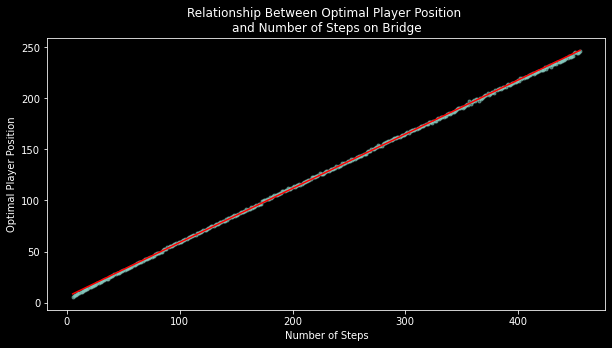

In [40]:
plt.figure(figsize=(10,5))
plt.plot(x, y, '.', alpha=0.5)
plt.plot(x, m*x + b, color='red')
plt.gca().set(title='Relationship Between Optimal Player Position \nand Number of Steps on Bridge', ylabel='Optimal Player Position', xlabel='Number of Steps')
plt.savefig('relationship.png', bbox_inches='tight', dpi = 300)
plt.show()

In [31]:
m

0.5301834664364344

In [32]:
b

5.833855934697729

**optimal position = 0.53\*(number of steps) + 5.8**